### TASK-
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

## Data preprocessing

In [78]:
# importing  basic libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# importing dataset
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [80]:
data.shape

(200, 5)

In [81]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

### As we can see the dataset is having 5 columns and 200 rows 
1) Unnamed:0 - this column is index values so it is of no use

2) TV - tv column shows the money provided for advertising on tv to increase sales

3) Radio - Radio column shows the money provided for advertising on Radio to increase sales

3) newspaper - Newspaper column shows the money provided for advertising on Newspaper to increase sales

4) sales - how much sale of the product according to TV,newspaper and radio.

In [82]:
# statistical values
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


#### observation-
- TV column shows it is well distributed for all quantile range
- radio column it is well distributed for all quantile range
- newspaper column the difference in 75% quantile range and 100%(max) is soo much soo there can be skewness
- sales column it is target column so no changes for it.
#### we will check the skewness for all the columns 

## Data cleaning

In [83]:
data.drop(columns=['Unnamed: 0'],inplace=True,axis=1)

In [84]:
data.sample(5)

,TV,radio,newspaper,sales
150,280.7,13.9,37.0,16.1
119,19.4,16.0,22.3,6.6
24,62.3,12.6,18.3,9.7
15,195.4,47.7,52.9,22.4
47,239.9,41.5,18.5,23.2


## EDA(Exploratory data analysis)

In [85]:
import warnings 
warnings.filterwarnings('ignore')

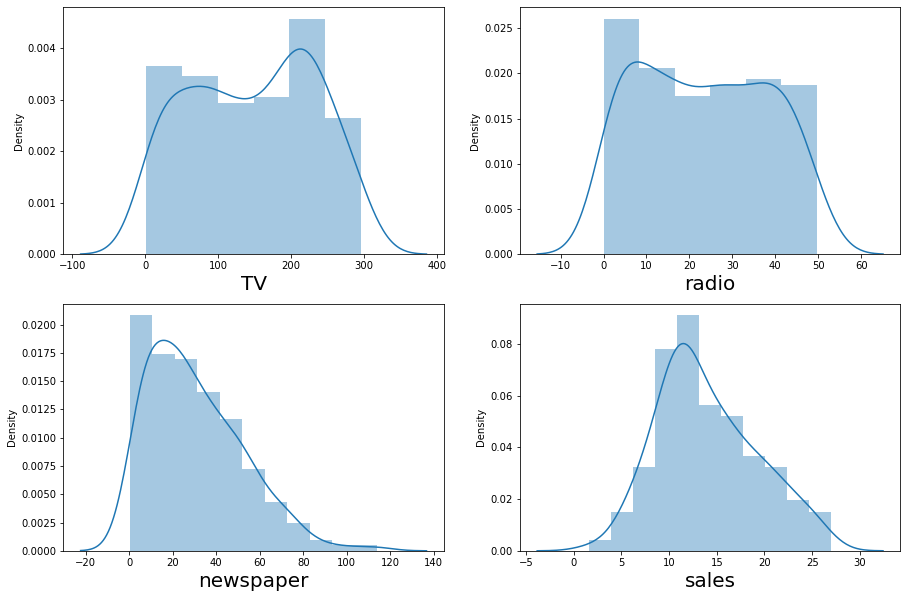

In [86]:
plt.figure(figsize=(15,10))
plotnumber=1

for column in data:
    if plotnumber<=4: #as there are 12 columns in data
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

### there is skewness in all columns so it should be removed not for target column(sales)

In [87]:
data.corr()['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

<AxesSubplot:title={'center':'Correlation with sales'}>

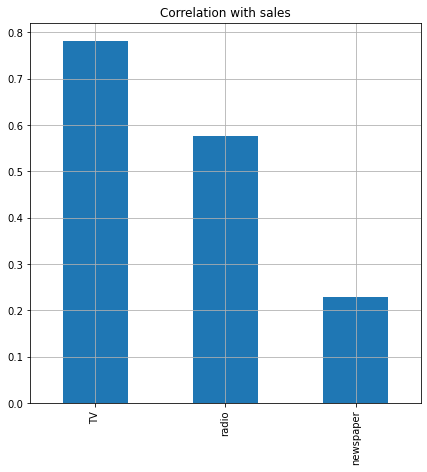

In [88]:
# visualize the correlation
data.drop('sales', axis =1).corrwith(data['sales']).plot(kind ='bar',grid = True, figsize = (7,7),
                                                   title = 'Correlation with sales')

##### As we can see by this,
- TV column is having very good corelation
- radio column is having good corelation
- newspaper column is having week among all other columns

<function matplotlib.pyplot.show(close=None, block=None)>

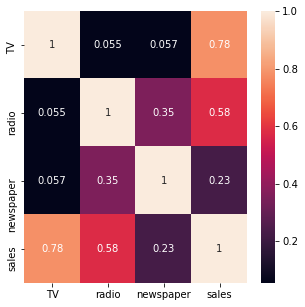

In [89]:
### plotting heatmap
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),annot=True)
plt.show

#### The lmplot is used to plot scatter plots with regression lines on FacetGrid objects

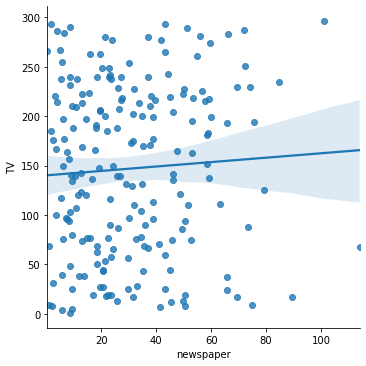

In [90]:
sns.lmplot(y='TV',x='newspaper',data=data)

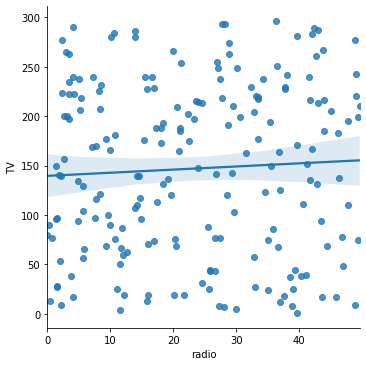

In [91]:
sns.lmplot(y='TV',x='radio',data=data)

###### as we can see they are having no corelation and trend as they are having very random best fit line

### checking for outliers

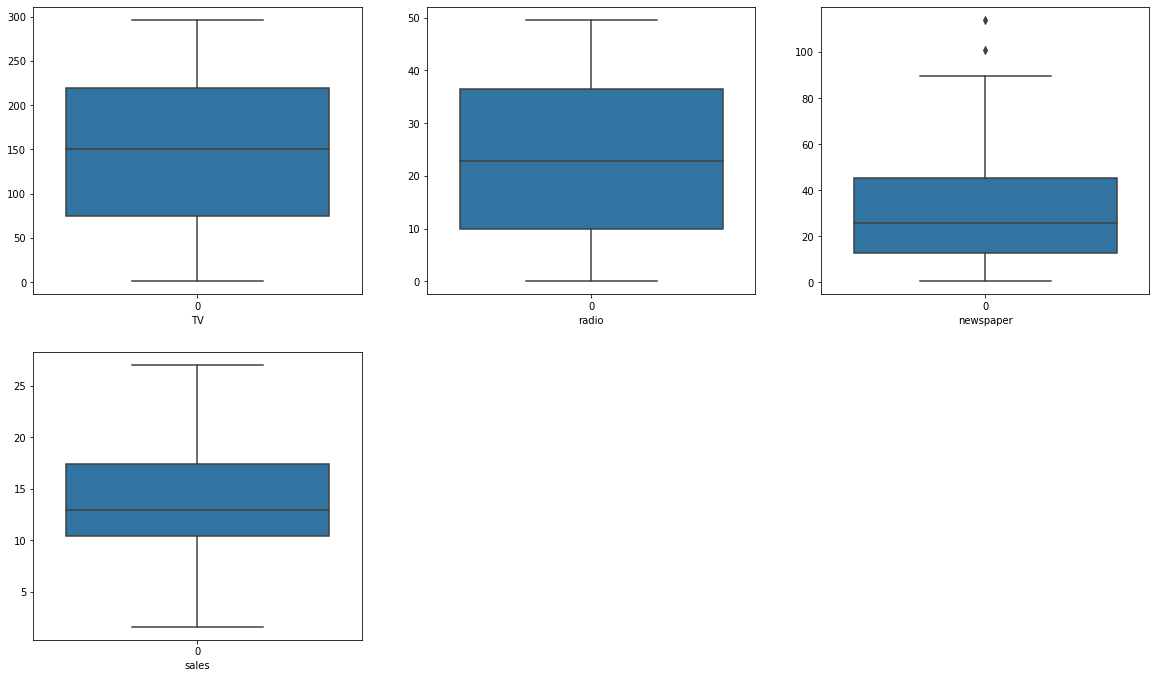

In [92]:
plt.figure(figsize=(20,18))
graph=1

for column in data:
    if graph<=9:
        ax=plt.subplot(3,3,graph)
        sns.boxplot(data = data[column],orient="v")
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

- seems only newspaper column are having outliers but it is close to wiskers.
soo,
it will not impact much and after normalization it will not have outliers

### Data normalization
##### Removing skewness(power transformer)

In [93]:
features = ['TV','radio','newspaper']
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
data[features]  = pt.fit_transform(data[features].values)
data.head()

,TV,radio,newspaper,sales
0,0.948674,0.962247,1.514335,22.1
1,-1.191314,1.040179,0.787683,10.4
2,-1.647757,1.370710,1.516998,9.3
3,0.141020,1.142387,1.214656,18.5
4,0.452715,-0.748651,1.211704,12.9


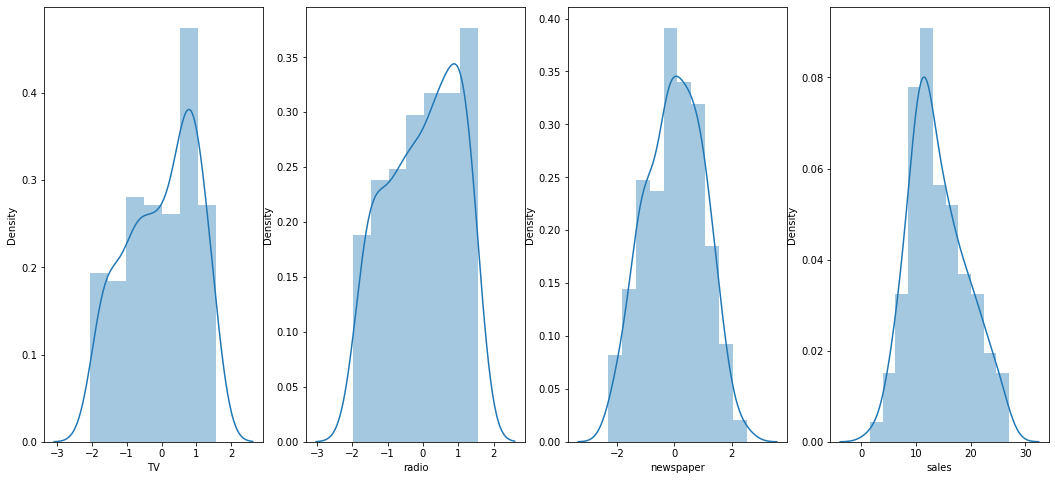

In [94]:
plt.figure(figsize=(18,8))
plotnumber=1

for column in data:
    if plotnumber<=4: #as there are 12 columns in data
        ax=plt.subplot(1,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber +=1
plt.show()

### data standardization

In [95]:
X = data.drop(columns = ['sales'],axis=1)
y = data['sales']

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled[1]

array([-1.19131426,  1.0401788 ,  0.78768252])

#### Checking for variance influence factor(vif) 

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns

# lets check the vif
vif

,vif,Features
0,1.003112,TV
1,1.094332,radio
2,1.093766,newspaper


##### it seems there is no multicolinearity problem in this 

In [100]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [101]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train) 
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"model perform very well")
        print("At random state",i)
        print('Training accuracy score is',r2_score(y_train,pred_train)*100)
        print('Testing accuracy score is',r2_score(y_test,pred_test)*100)

At random state 203 model perform very well
At random state 203
Training accuracy score is 90.69383929212164
Testing accuracy score is 90.650803218975
At random state 330 model perform very well
At random state 330
Training accuracy score is 90.65949346715982
Testing accuracy score is 90.6846813755211
At random state 374 model perform very well
At random state 374
Training accuracy score is 90.68792988449351
Testing accuracy score is 90.66686787438638
At random state 422 model perform very well
At random state 422
Training accuracy score is 90.44682651704473
Testing accuracy score is 90.44496504975903
At random state 446 model perform very well
At random state 446
Training accuracy score is 90.63652133282854
Testing accuracy score is 90.58659692857537
At random state 480 model perform very well
At random state 480
Training accuracy score is 90.74504561185137
Testing accuracy score is 90.65888442904638
At random state 588 model perform very well
At random state 588
Training accuracy sco

In [102]:
### random state = 907 is taken 

Mean absolute error - The mean absolute error is the average of all absolute errors of the data collected. It is abbreviated as MAE (Mean Absolute Error). It is obtained by dividing the sum of all the absolute errors with the number of errors.

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=907)

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))

90.7227899601845
1.2202921349669416


In [105]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
las = Lasso()
las.fit(x_train,y_train)
pred = las.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))

86.08595778602778
1.3566607031663653


In [112]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
ridge = Ridge()
ridge.fit(x_train,y_train)
pred = ridge.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))

90.8105280115
1.2180173675528025


In [106]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))

97.74619806083744
0.6103249999999983


In [108]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))

97.69349229424517
0.597001580550125


In [109]:
from xgboost import XGBRegressor
xgbt = GradientBoostingRegressor()
xgbt.fit(x_train,y_train)
pred = xgbt.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))

97.70408250383308
0.5949920791274351


In [114]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
print(r2_score(y_test,pred_svr)*100)
print(mean_absolute_error(y_test,pred_svr))

92.60684286175973
0.8526560303753381


### cross validation 

In [117]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr, X, y, cv=5)
print("Cross validation score of linear regression model is",scr.mean()*100)

Cross validation score of linear regression model is 89.78060430607071


In [118]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(las, X, y, cv=5)
print("Cross validation score of lasso model is",scr.mean()*100)

Cross validation score of lasso model is 82.70960357806553


In [119]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(ridge, X, y, cv=5)
print("Cross validation score of ridge model is",scr.mean()*100)

Cross validation score of ridge model is 89.78620959324853


In [121]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf, X, y, cv=5)
print("Cross validation score of Random forest model is",scr.mean()*100)

Cross validation score of Random forest model is 97.54247375721819


In [122]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(gb, X, y, cv=5)
print("Cross validation score of Gradient boosting model is",scr.mean()*100)

Cross validation score of Gradient boosting model is 97.75796738021599


In [123]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(xgbt, X, y, cv=5)
print("Cross validation score of xtreme Gradient boosting model is",scr.mean()*100)

Cross validation score of xtreme Gradient boosting model is 97.77261510143698


In [124]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(svr, X, y, cv=5)
print("Cross validation score of support vector machine model is",scr.mean()*100)

Cross validation score of support vector machine model is 91.71386899137437


#### by cross validation we will select the model,  Xtreme gradient boosting

### hyper parameter tuning
Gridsearchcv for xgboost

In [158]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

params = {'learning_rate':np.arange(0.1,0.35,0.1),
          'n_estimators':range(19,24,2),
        'max_depth':range(2,8,2),
          'alpha':np.arange(0.5,0.9,0.1)
         }
GCV = GridSearchCV(gb,params,cv=5,scoring='accuracy')

GCV.fit(x_train,y_train)  #fitting the data in model
GCV.best_params_          #printing the best parameter found by Gridsearchcv
GCV_pred = GCV.best_estimator_.predict(x_test) #predicting with best parameter 
print(GCV.best_estimator_)        
#checking final accuracy
print('\nR2_score =>','\n',r2_score(y_test,y_pred))
print('\nmean absolute error =>','\n',mean_absolute_error(y_test,y_pred))

GradientBoostingRegressor(alpha=0.5, max_depth=2, n_estimators=19)

R2_score => 
 0.9795411680266187

mean absolute error => 
 0.5876384737914842


### we have increase the accuracy and reduces the error

In [159]:
import joblib
joblib.dump(GCV.best_estimator_,'Advertising.pkl')

['Advertising.pkl']

In [161]:
model=joblib.load("E:\Datatrained projects\Datatrained-projects\Advertising Sales Channel Prediction\Advertising.pkl")
y_preds=model.predict(x_test)
predicted=pd.DataFrame(y_preds,columns=['predicted'])
predicted

,predicted
0,7.549073
1,11.953610
2,11.253251
3,21.611195
4,16.694383
5,10.010501
6,13.511124
7,11.253251
8,11.942084
9,12.839054
